# **EDA & Visualization for the Student Performance Dataset**



## Intuition of Distribution

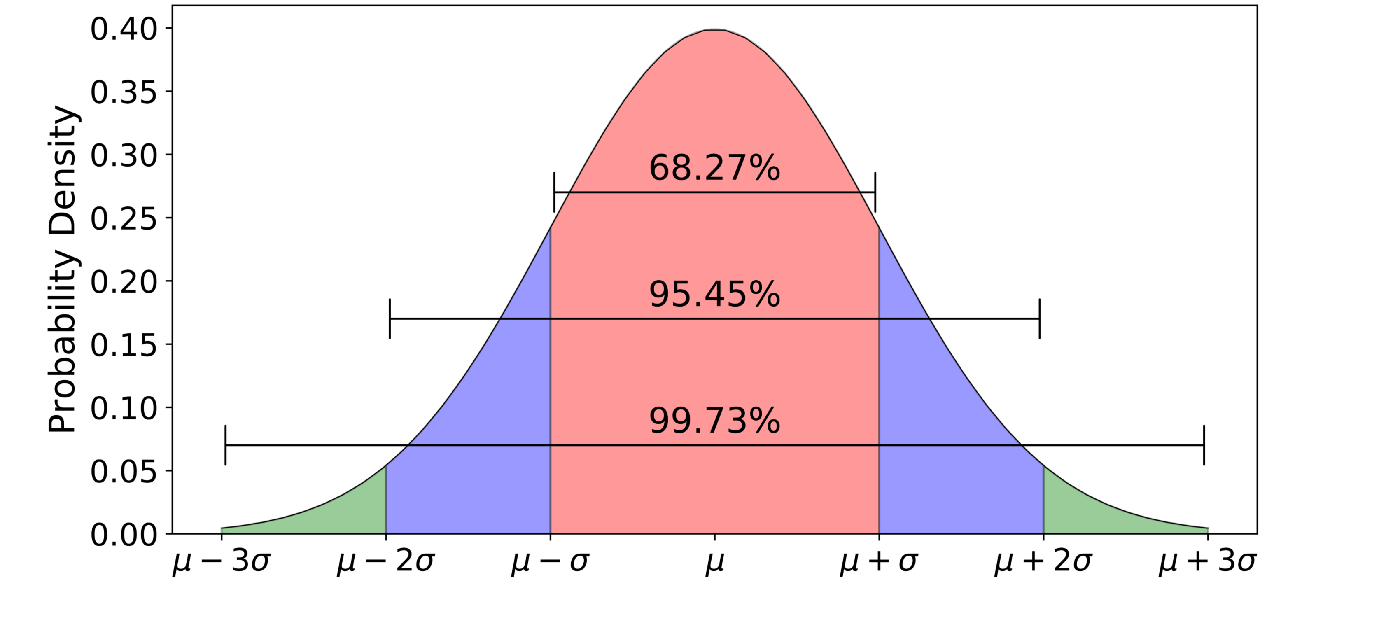

* ## Intuition about Skewed data

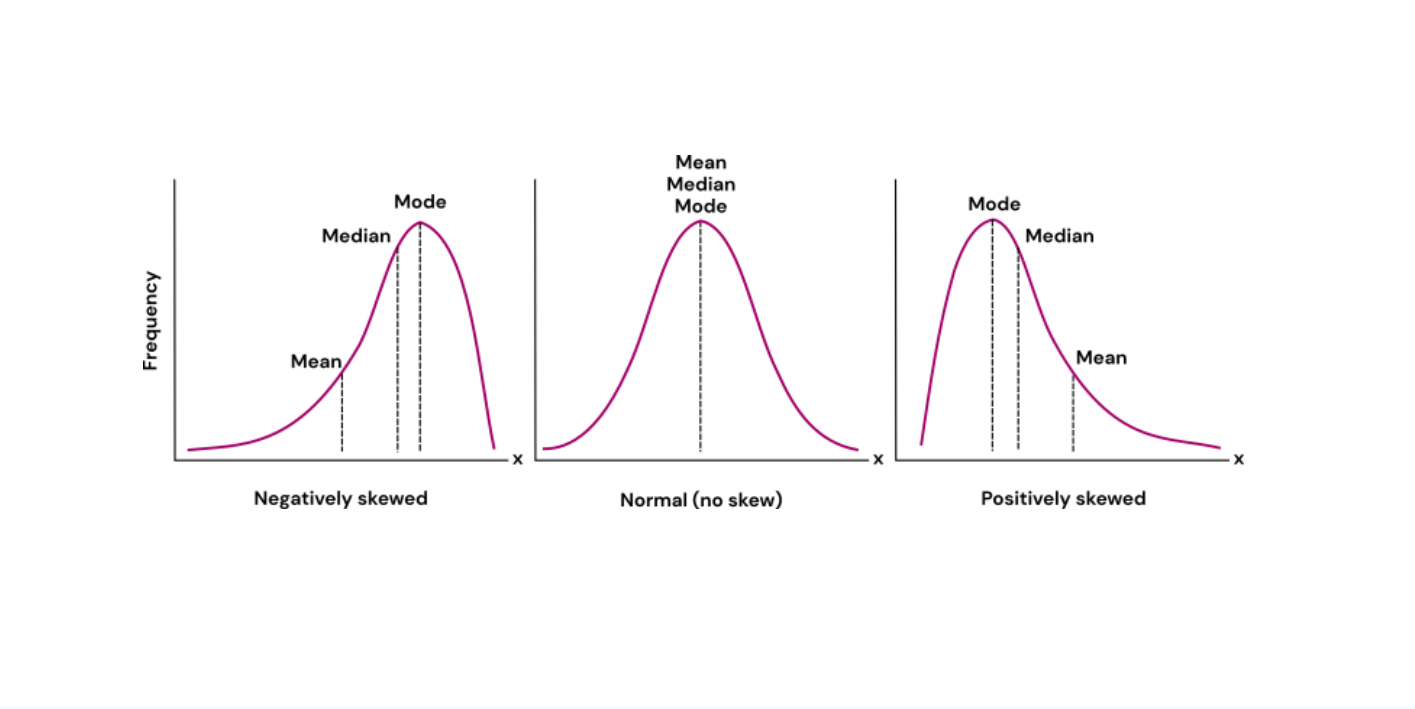

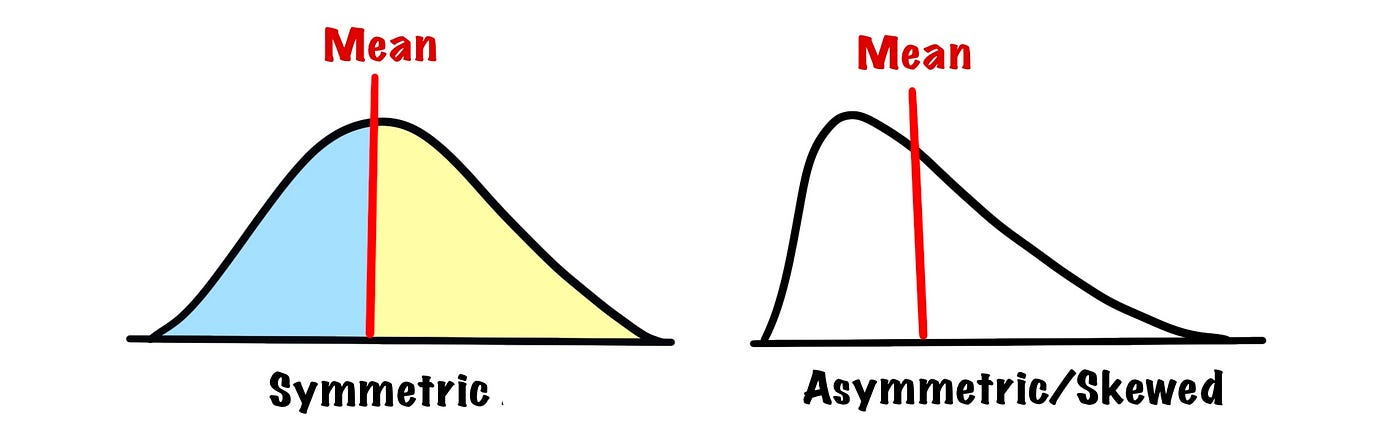

* ## StandardScaler, MinMaxScaler and RobustScaler techniques

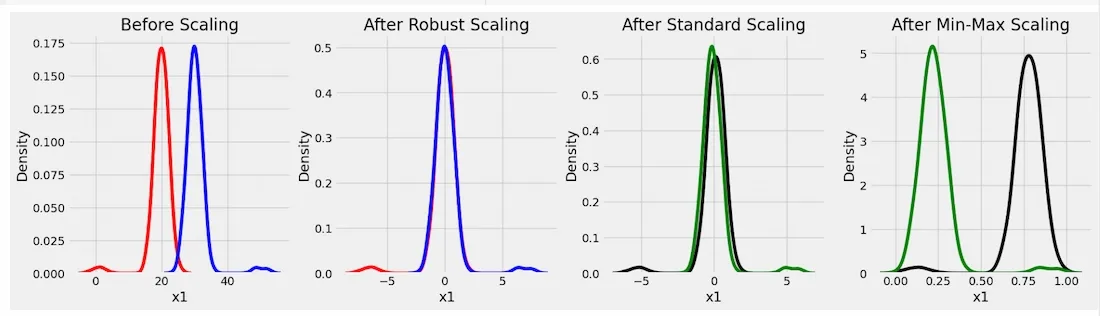

## Feature Scaling Techniques

---

## 1. StandardScaler

### Formula
$$
x_{scaled} = \frac{x - \mu}{\sigma}
$$

### Where
- **x** — original value  
- **μ** — mean of the feature  
- **σ** — standard deviation  

### Advantages
- Centers data around zero
- Scales features to unit variance
- Works well for distance-based and gradient-based models

### Disadvantages
- Sensitive to outliers
- Not suitable for highly non-normal distributions

---

## 2. MinMaxScaler

### Formula
$$
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

### Where
- **x** — original value  
- **xₘᵢₙ** — minimum feature value  
- **xₘₐₓ** — maximum feature value  

### Advantages
- Scales data into a fixed range (usually [0, 1])
- Easy to interpret
- Preserves relative distances

### Disadvantages
- Very sensitive to outliers
- Extreme values can compress most data points

---

## 3. RobustScaler

### Formula
$$
x_{scaled} = \frac{x - \text{median}(x)}{Q_3 - Q_1}
$$

### Where
- **median(x)** — 50th percentile (Q₂)
- **Q₁** — first quartile (25%)
- **Q₃** — third quartile (75%)

### Advantages
- Resistant to outliers
- Maintains structure of non-outlier data

### Disadvantages
- Less interpretable than MinMaxScaler
- May perform poorly on highly skewed data


#**Code**

In [8]:
!pip install kagglehub
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 4.1 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 4.3 MB/s  0:00:02m0:00:0100:01
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 2.9 MB/s  0:00:03m0:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 4.0 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [3]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



/home/blueberry/Picsart-Academy/.venv/lib64/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download latest version


In [4]:
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")
df = pd.read_csv(f"{path}/Student_performance_data _.csv")
print("Path to dataset files:", path)

Path to dataset files: /home/blueberry/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2


## EDA
First Look (Data Understanding) Data overview

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [18]:
df.describe()
# df.StudentID = df['StudentID'] - 1000
# df.describe()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,-2803.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,-3999.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3401.250000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,-2803.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,-2205.750000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,-1608.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [9]:
grade_map = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "F"
}

df["GradeLabel"] = df["GradeClass"].map(grade_map)


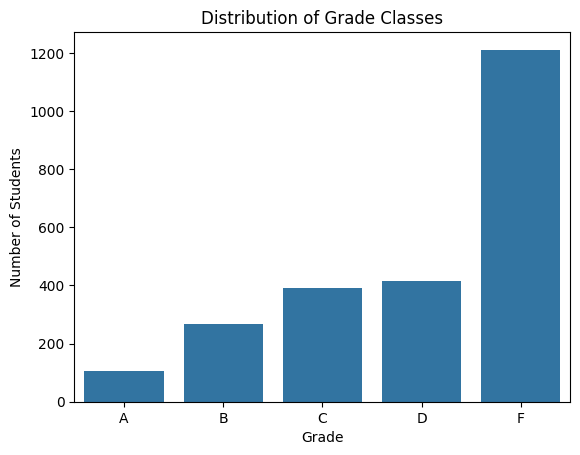

In [10]:
sns.countplot(
    x="GradeLabel",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Distribution of Grade Classes")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

<Axes: xlabel='Age', ylabel='count'>

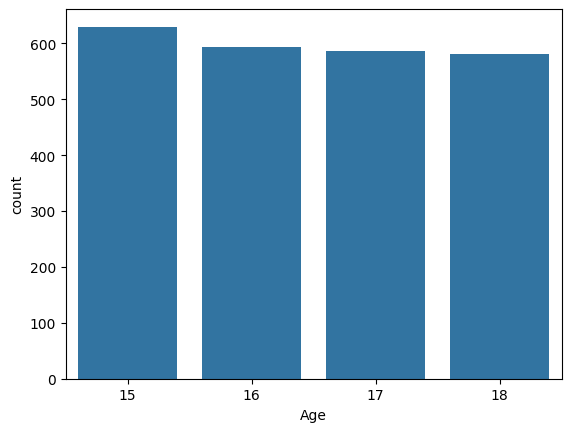

In [21]:
sns.countplot(x = "Age",
              data = df)

<Axes: xlabel='Ethnicity', ylabel='count'>

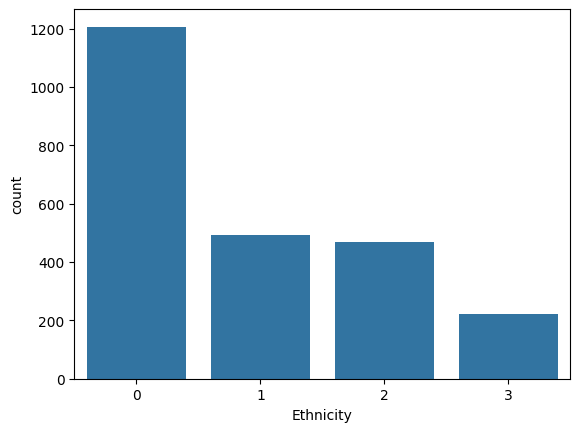

In [22]:
sns.countplot(x = "Ethnicity",
              data = df)

<Axes: xlabel='ParentalEducation', ylabel='GPA'>

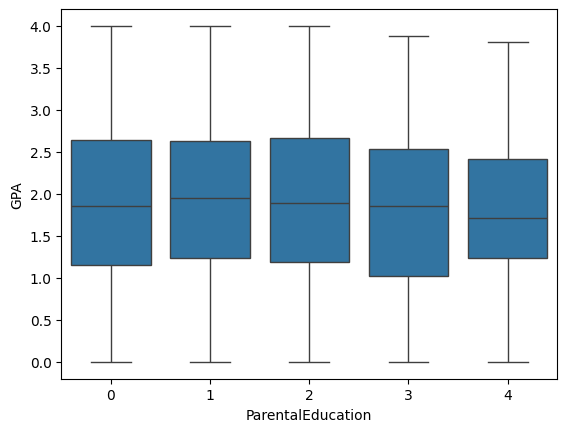

In [23]:
sns.boxplot(x=df["ParentalEducation"], y=df["GPA"])


<Axes: xlabel='ParentalEducation', ylabel='GPA'>

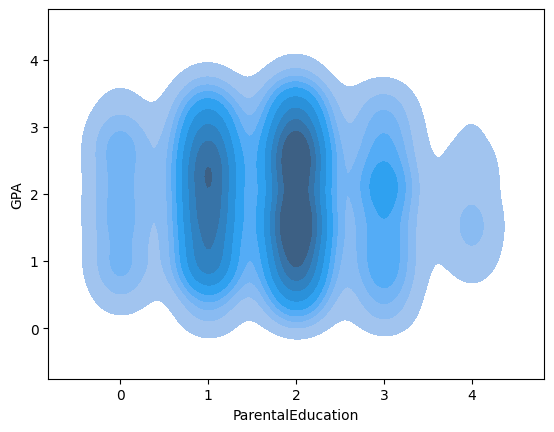

In [36]:
sns.kdeplot(x=df['ParentalEducation'], y=df['GPA'], fill = True)

## Univariate Analysis (One Variable at a Time)
Histogram with KDE

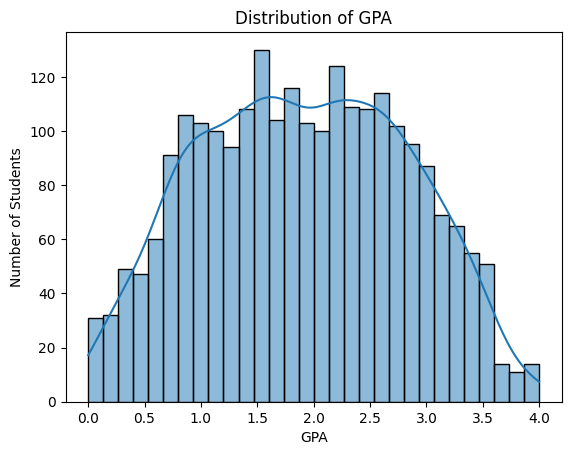

In [37]:

sns.histplot(
    df["GPA"],
    bins=30,
    kde=True
)

plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.show()

(array([ 31.,  32.,  49.,  47.,  60.,  91., 106., 103., 100.,  94., 108.,
        130., 104., 116., 103., 100., 124., 109., 108., 114., 102.,  95.,
         87.,  69.,  65.,  55.,  51.,  14.,  11.,  14.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        ]),
 <BarContainer object of 30 artists>)

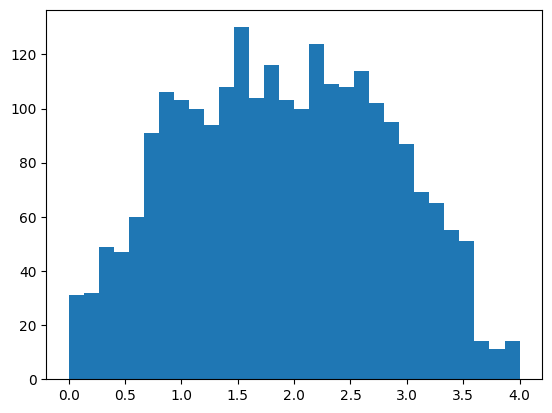

In [38]:
plt.hist(df["GPA"],bins = 30)


Histogram — StudyTimeWeekly

Text(0, 0.5, 'Number of Students')

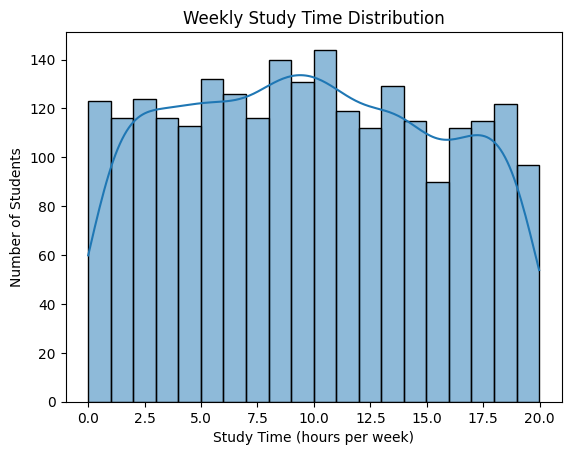

In [39]:
sns.histplot(
    df["StudyTimeWeekly"],
    bins=20,
    kde=True
)

plt.title("Weekly Study Time Distribution")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Number of Students")

Histogram — Absences

Text(0, 0.5, 'Number of Students')

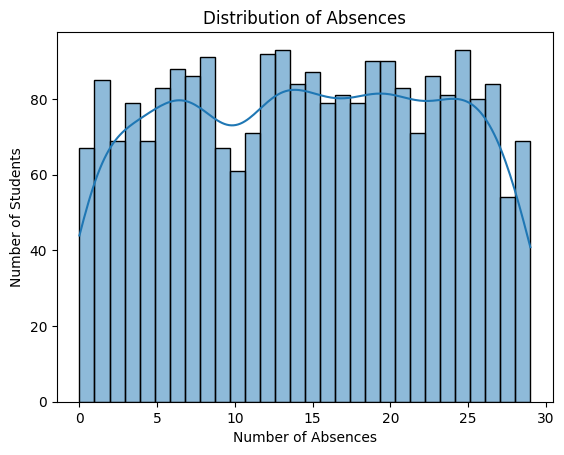

In [40]:
sns.histplot(
    df["Absences"],
    bins=30,
    kde=True
)

plt.title("Distribution of Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Number of Students")

Gender Distribution


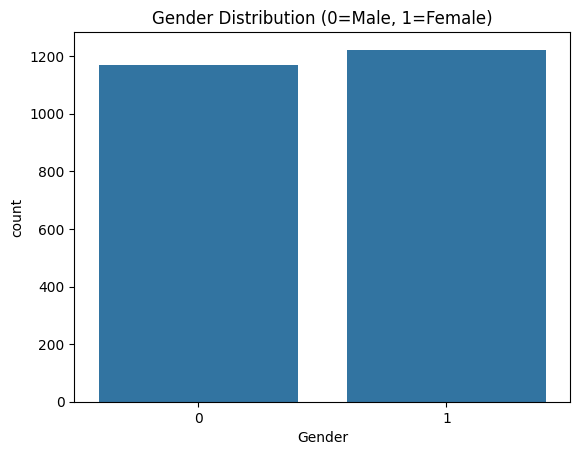

In [41]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution (0=Male, 1=Female)")
plt.show()


Ethnicity Distribution

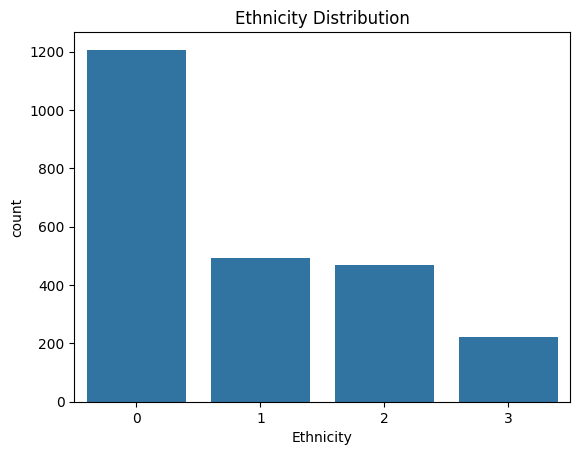

In [42]:
sns.countplot(x="Ethnicity", data=df)
plt.title("Ethnicity Distribution")
plt.show()


In [ ]:
categorical_activities = [
    "Extracurricular",
    "Sports",
    "Music",
    "Volunteering"
]

for col in categorical_activities:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Participation (0=No, 1=Yes)")
    plt.show()


## Boxplot — GPA vs GradeClass
Goal

  * Sanity check the target variable

  * Verify that GradeClass is correctly derived from GPA




Text(0, 0.5, 'GPA')

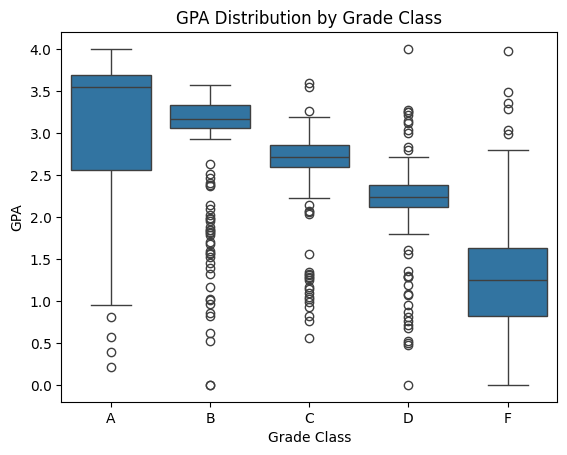

In [11]:
sns.boxplot(
    x="GradeLabel",
    y="GPA",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("GPA Distribution by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("GPA")



Boxplot — StudyTimeWeekly vs GradeClass
Goal

* Observe performance trend

* Understand variability within grades

Text(0, 0.5, 'Study Time (hours/week)')

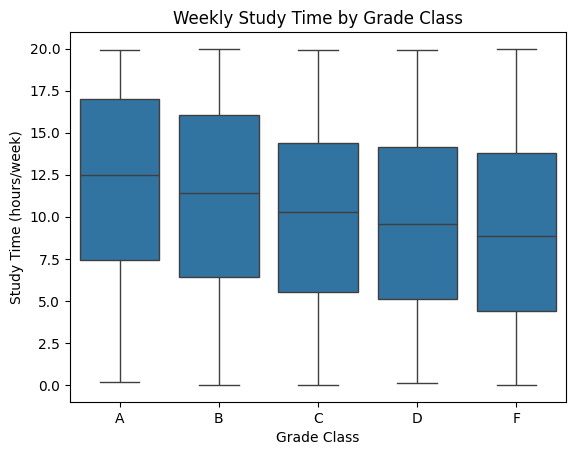

In [44]:
sns.boxplot(
    x="GradeLabel",
    y="StudyTimeWeekly",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Weekly Study Time by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("Study Time (hours/week)")


Boxplot — Absences vs GradeClass

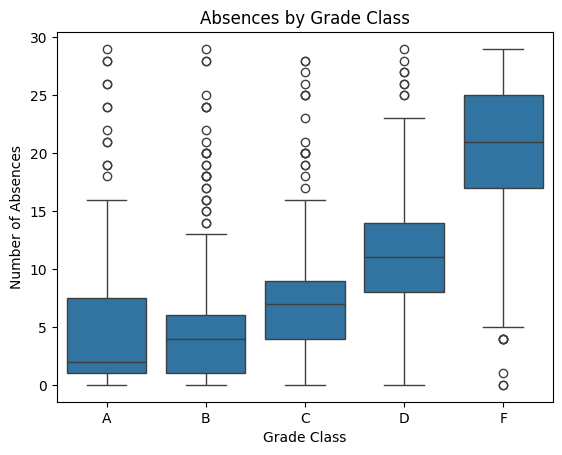

In [45]:
sns.boxplot(
    x="GradeLabel",
    y="Absences",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Absences by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("Number of Absences")
plt.show()


Bar Plot — Tutoring vs GradeClass (Normalized)
Goal

* Compare proportions, not raw counts

* Evaluate intervention impact

In [ ]:
tutoring_dist = (
    df.groupby("Tutoring")["GradeLabel"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)
tutoring_dist.head()
sns.barplot(
    x="GradeLabel",
    y="Percentage",
    hue="Tutoring",
    data=tutoring_dist,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Grade Distribution by Tutoring Status (%)")
plt.xlabel("Grade Class")
plt.ylabel("Percentage of Students")
plt.show()


Tutoring  GradeLabel
0         F             52.782765
          D             18.013166
          C             16.337522
          B              9.575105
          A              3.291442
Name: Percentage, dtype: float64

## Scatter Plot — StudyTimeWeekly vs GPA
Goal

* Examine relationship strength

* Understand that weak correlation can still matter

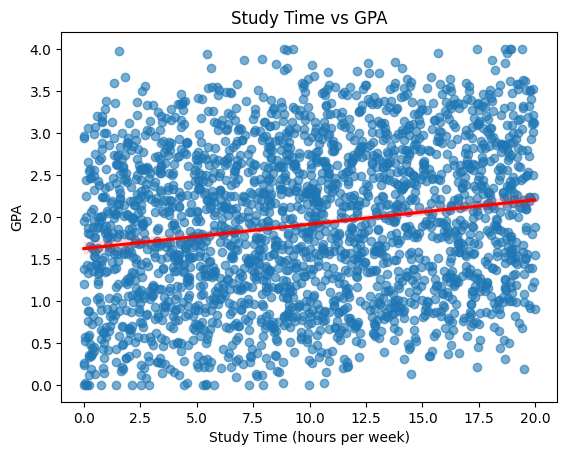

In [6]:
sns.regplot(
    x="StudyTimeWeekly",
    y="GPA",
    data=df,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

plt.title("Study Time vs GPA")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("GPA")
plt.show()


Scatter Plot — Absences vs GPA

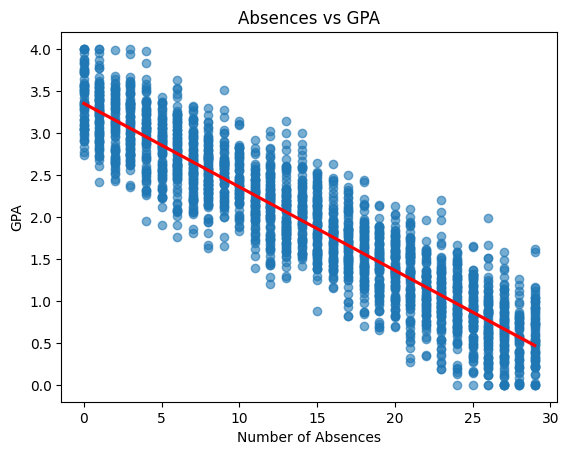

In [12]:
sns.regplot(
    x="Absences",
    y="GPA",
    data=df,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

plt.title("Absences vs GPA")
plt.xlabel("Number of Absences")
plt.ylabel("GPA")
plt.show()


Pairplot — Multivariate View

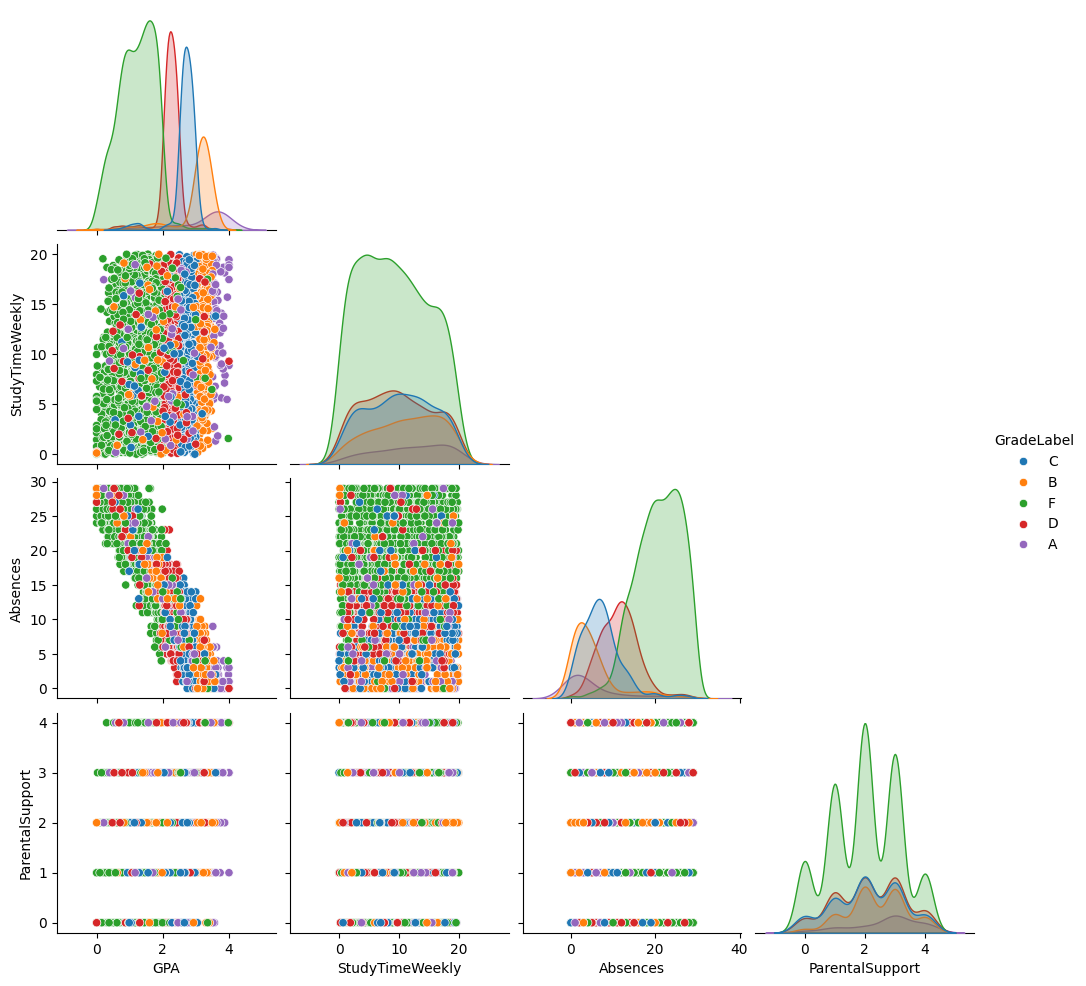

In [13]:
selected_features = [
    "GPA",
    "StudyTimeWeekly",
    "Absences",
    "ParentalSupport"
]

sns.pairplot(
    df[selected_features + ["GradeLabel"]],
    hue="GradeLabel",
    diag_kind="kde",
    corner=True
)

plt.show()


## Violin Plot — GPA by Gender
Goal

* Compare full distributions, not just averages

* Visualize density and spread

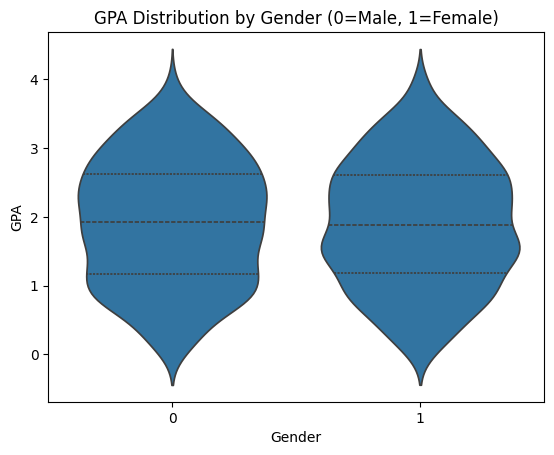

In [14]:
sns.violinplot(
    x="Gender",
    y="GPA",
    data=df,
    inner="quartile"
)

plt.title("GPA Distribution by Gender (0=Male, 1=Female)")
plt.xlabel("Gender")
plt.ylabel("GPA")
plt.show()


GPA by ParentalEducation

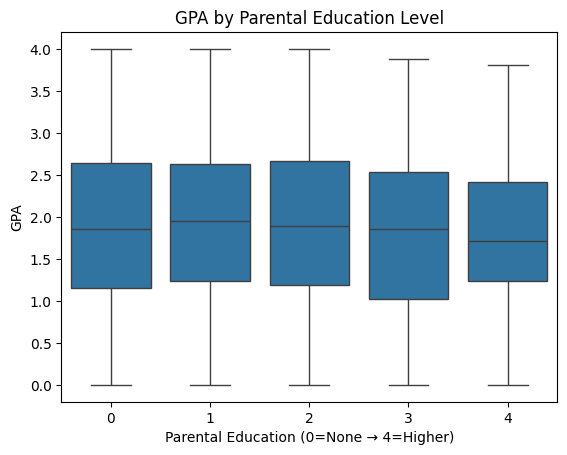

In [15]:
sns.boxplot(
    x="ParentalEducation",
    y="GPA",
    data=df,
    order=[0, 1, 2, 3, 4]
)

plt.title("GPA by Parental Education Level")
plt.xlabel("Parental Education (0=None → 4=Higher)")
plt.ylabel("GPA")
plt.show()


## Heatmap — Correlation Matrix
Goal

* Quantify linear relationships

* Guide feature selection

* Detect redundancy

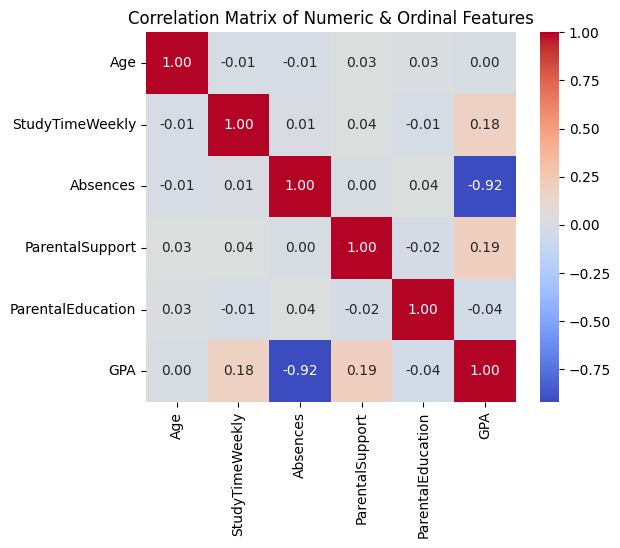

In [16]:
numeric_features = [
    "Age",
    "StudyTimeWeekly",
    "Absences",
    "ParentalSupport",
    "ParentalEducation",
    "GPA"
]

corr_matrix = df[numeric_features].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Matrix of Numeric & Ordinal Features")
plt.show()


# PCA

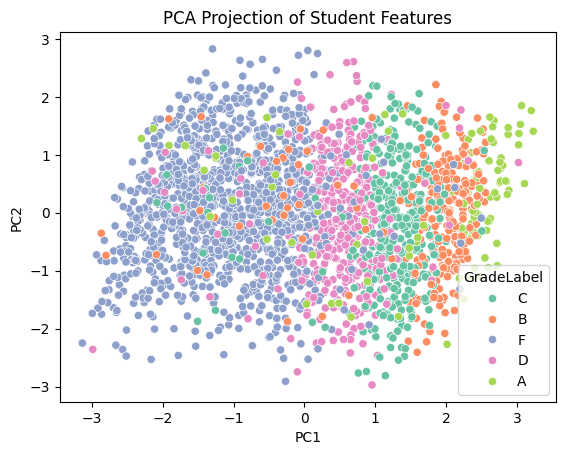

In [21]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features for PCA
numeric_cols = [
    "Age", "StudyTimeWeekly", "Absences", "ParentalSupport", "GPA"
]

X = df[numeric_cols]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["GradeLabel"] = df["GradeLabel"]

# Plot
sns.scatterplot(x="PC1", y="PC2", hue="GradeLabel", data=pca_df, palette="Set2")
plt.title("PCA Projection of Student Features")
plt.show()


## TSNE

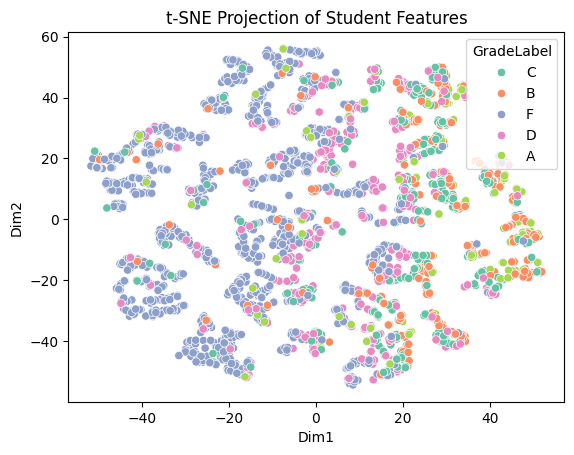

In [22]:
from sklearn.manifold import TSNE

# Use standardized features
tsne = TSNE(n_components=2, random_state=42, learning_rate="auto", init="pca")
X_tsne = tsne.fit_transform(X_scaled)

# Plot
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["GradeLabel"] = df["GradeLabel"]

sns.scatterplot(x="Dim1", y="Dim2", hue="GradeLabel", data=tsne_df, palette="Set2")
plt.title("t-SNE Projection of Student Features")
plt.show()


## Subplots

<Axes: >

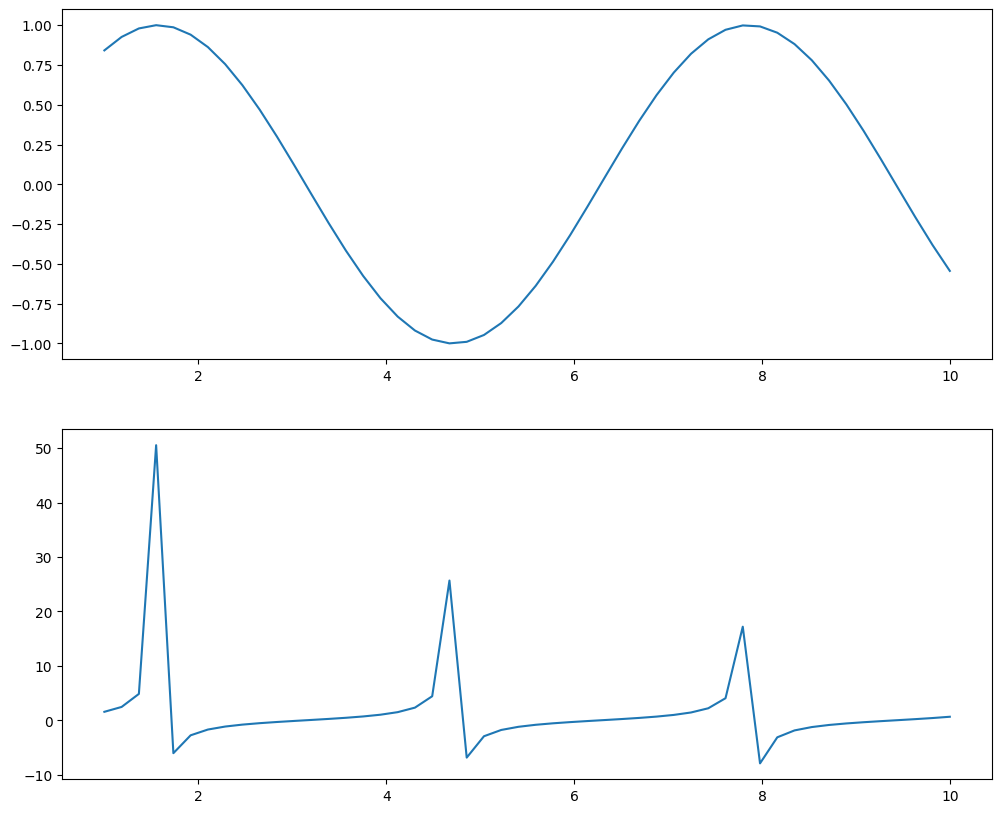

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.lineplot(x=np.linspace(1, 10), y=np.sin(np.linspace(1, 10)), ax=ax[0])
sns.lineplot(x=np.linspace(1, 10), y=np.tan(np.linspace(1, 10)), ax=ax[1])



[Python Graph Gallery](https://python-graph-gallery.com)